In [1]:
# sliding window

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import file

chr_lengths = pd.read_csv('../sliding_window/chr_all_lengths.txt', sep = '\t')
df = pd.read_csv('/project/cultibv/fwasch/MultiBeet/Company_allsug_42Forests_no_mitch/feat_importances/Comp_nomitch_features_highest_per_tree.csv', sep = '\t')

In [2]:
# remove un scaffolds
df = df[~df['Scaffold'].str.contains('un')]
chr_lengths = chr_lengths[~chr_lengths['Sca'].str.contains('un')]

In [3]:
def sliding_window_feats(sca_length, window_size, step_size, scaffold):
    sca = df[df['Scaffold'].str.contains(scaffold)]
    sliding_list=[]
    lst = list(range(1,sca_length+1))
    for i in range(len(lst))[::step_size]:
        feats = sca.loc[(df['Position'] >= i) & (sca['Position'] <= i+window_size)].Importance.sum()
        feats_list = feats.tolist()
        sliding_list.append(feats_list)
    return sliding_list

In [4]:
def sliding_window_counts(sca_length, window_size, step_size, scaffold):
    sca = df[df['Scaffold'].str.contains(scaffold)]
    sliding_list=[]
    lst = list(range(1,sca_length+1))
    for i in range(len(lst))[::step_size]:
        counts = pd.cut(sca.Position, [i ,i+window_size]).value_counts()
        counts_list = counts.tolist()
        sliding_list.extend(counts_list)
    return sliding_list

In [5]:
sliding_list_feats = sliding_window_feats(4672055, 5000, 2500, "Bvchr3.sca005")
sliding_list_counts = sliding_window_counts(4672055, 5000, 2500, "Bvchr3.sca005")
df_test = pd.DataFrame()

df_test['feats'] = sliding_list_feats
df_test['loc'] = range(1,4672055,2500)
df_test['loc'] = df_test['loc']/1000000

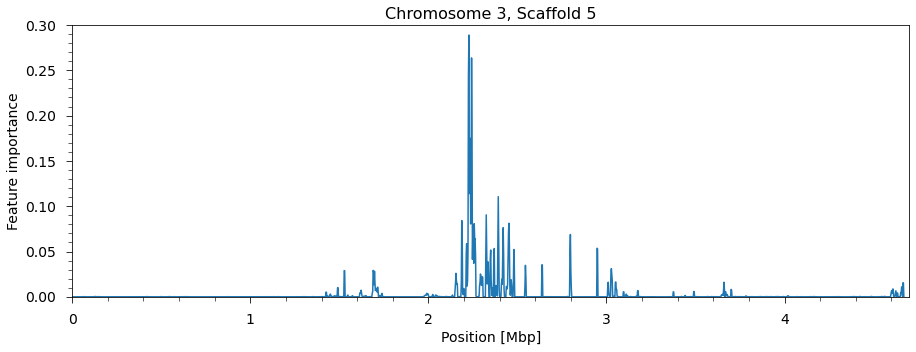

In [6]:
plt_1 = plt.figure(figsize=(15, 5))
 # name the labels
plt.xlabel('Position [Mbp]', fontsize= 14)
plt.ylabel('Feature importance', fontsize= 14)
plt.title('Chromosome 3, Scaffold 5', fontsize= 16)
plt.tick_params(axis='both', which='major', labelsize=14, length=6, pad = 10)
plt.tick_params(which='minor', length=4)
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylim(0, 0.3)
#plt.xticks(np.arange(0, 5, 0.5)) 
plt.minorticks_on()
plt.xlim(0,4.7)

#plt.axhline(y = 0.01, color = 'r', linestyle = '--')

plt.plot(df_test['loc'], sliding_list_feats)

plt.savefig("/project/cultibv/fwasch/MultiBeet/Paper/Figures/SupFigure_BreedingSignal_v2.svg")


In [15]:
sliding_list_feats = sliding_window_feats(4703435, 5000, 2500, "Bvchr5.sca023")
sliding_list_counts = sliding_window_counts(4703435, 5000, 2500, "Bvchr5.sca023")
df_test = pd.DataFrame()

df_test['feats'] = sliding_list_feats
df_test['loc'] = range(1,4703435,2500)
df_test['loc'] = df_test['loc']/1000000

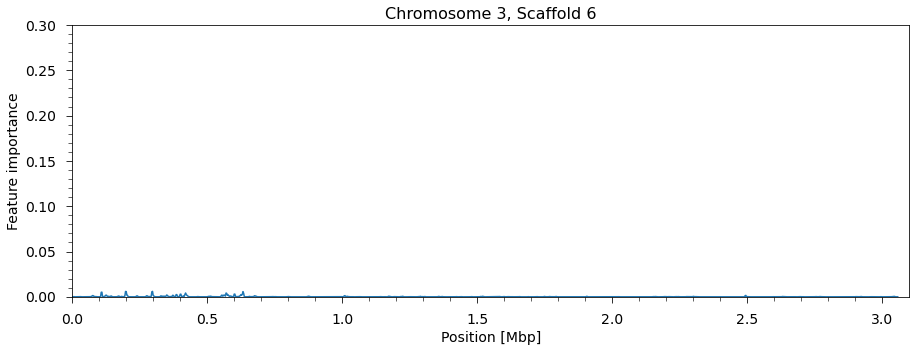

In [18]:
plt_1 = plt.figure(figsize=(15, 5))
 # name the labels
plt.xlabel('Position [Mbp]', fontsize= 14)
plt.ylabel('Feature importance', fontsize= 14)
plt.title('Chromosome 3, Scaffold 6', fontsize= 16)
plt.tick_params(axis='both', which='major', labelsize=14, length=6, pad = 10)
plt.tick_params(which='minor', length=4)
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylim(0, 0.3)
#plt.xticks(np.arange(0, 5, 0.5)) 
plt.minorticks_on()
plt.xlim(0,3.1)

#plt.axhline(y = 0.01, color = 'r', linestyle = '--')

plt.plot(df_test['loc'], sliding_list_feats)

In [19]:
sliding_list_feats = sliding_window_feats(4703435, 5000, 2500, "Bvchr5.sca023")
sliding_list_counts = sliding_window_counts(4703435, 5000, 2500, "Bvchr5.sca023")
df_test = pd.DataFrame()

df_test['feats'] = sliding_list_feats
df_test['loc'] = range(1,4703435,2500)
df_test['loc'] = df_test['loc']/1000000

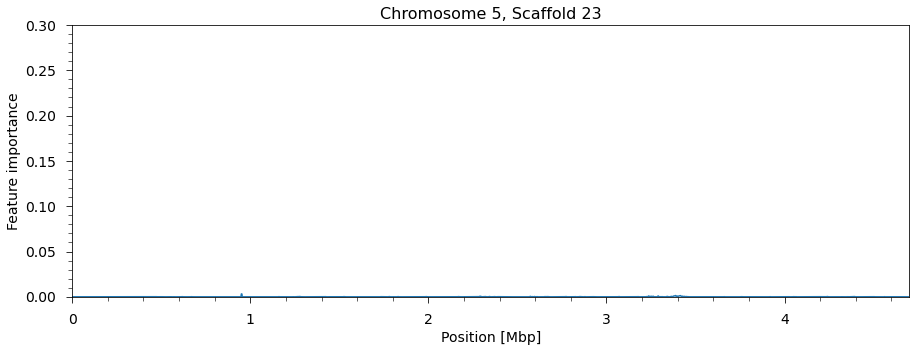

In [20]:
plt_1 = plt.figure(figsize=(15, 5))
 # name the labels
plt.xlabel('Position [Mbp]', fontsize= 14)
plt.ylabel('Feature importance', fontsize= 14)
plt.title('Chromosome 5, Scaffold 23', fontsize= 16)
plt.tick_params(axis='both', which='major', labelsize=14, length=6, pad = 10)
plt.tick_params(which='minor', length=4)
plt.gca().xaxis.get_offset_text().set_fontsize(14)
plt.ylim(0, 0.3)
#plt.xticks(np.arange(0, 5, 0.5)) 
plt.minorticks_on()
plt.xlim(0,4.7)

#plt.axhline(y = 0.01, color = 'r', linestyle = '--')

plt.plot(df_test['loc'], sliding_list_feats)

In [13]:
# iterate through all scaffolds on chr6 and plot the sliding window
sig_windows = pd.DataFrame()

for index, row in chr_lengths.iterrows(): 
    print(row['Sca'])
    sliding_list_feats = sliding_window_feats(row['length'], 5000, 2500, row['Sca'])
    
    df_test = pd.DataFrame()

    df_test['chr'] = row['Sca']
    df_test['feats'] = sliding_list_feats
    df_test['loc'] = range(1,row['length'],2500)
    #q = df_test['feats'].quantile(0.99)
    #print(q)
    #df_test.loc[(df_test['feats'] >= 0.01)]
    #sig_windows = sig_windows.append(df_test, ignore_index=True)
    
    
    plt_1 = plt.figure(figsize=(15, 5))
    # name the labels
    plt.xlabel('Position')
    plt.ylabel('Counts')
    plt.title(row['Sca'])
    plt.ylim(0, 0.06)

    plt.plot(range(1,row['length'],2500), sliding_list_feats)

Bvchr1.sca001


KeyboardInterrupt: 

In [14]:
sliding_window_feats

<function __main__.sliding_window_feats(sca_length, window_size, step_size, scaffold)>